In [174]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [175]:
FinalMerge = pd.read_excel('../2progs/FinalMerge.xlsx',sheet_name='Sheet1',index_col = 0)


In [176]:
FinalMerge

,hhid,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,...,lighting_source_Solar Energy,lighting_source_nan,share_toilet_No,share_toilet_Yes,share_toilet_nan,EducationTotalSpend,FoodTotalSpend,NonFoodTotalSpend,EnergyTotalSpend,Total_Spend
0,10,5,1,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,...,0,0,0,1,0,19100.000060,7642,1031.994440,1000,28773.994501
1,11,6,1,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,...,0,0,0,1,0,220.000000,2120,94.158150,550,2984.158150
2,12,6,1,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,...,1,0,0,0,1,400.000000,900,282.654090,200,1782.654090
3,14,14,1,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,...,0,0,0,0,1,250.000000,1910,159.810690,240,2559.810690
4,15,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,...,0,0,0,1,0,9500.000000,2210,596.885089,600,12906.885089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,5977,15,1,0.133333,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,...,0,0,0,1,0,600.000008,1420,210.000000,650,2880.000008
1086,5986,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,...,0,0,0,1,0,0.000000,820,618.490350,850,2288.490350
1087,5992,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1,0,0,1,0,500.000000,5700,0.000000,50,6250.000000
1088,6002,4,1,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,...,0,0,0,0,1,50.000000,2280,517.662840,0,2847.662840


In [177]:
FinalMerge['Total_Spend'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1085    False
1086    False
1087    False
1088    False
1089    False
Name: Total_Spend, Length: 1090, dtype: bool

In [178]:
FinalMerge['number_dwellings'] = FinalMerge['number_dwellings'].astype(float)
FinalMerge['number_habitablerooms'] = FinalMerge['number_habitablerooms'].astype(float)
#MergedDatasetDummies['floor_material'] = MergedDatasetDummies['floor_material'].astype(float)
#MergedDatasetDummies['roof_material'] = MergedDatasetDummies['roof_material'].astype(float)
#MergedDatasetDummies['wall_material'] = MergedDatasetDummies['wall_material'].astype(float)
#MergedDatasetDummies['toilet_type'] = MergedDatasetDummies['toilet_type'].astype(float)
#MergedDatasetDummies['share_toilet'] = MergedDatasetDummies['share_toilet'].astype(float)
#MergedDatasetDummies['lighting_source'] = MergedDatasetDummies['lighting_source'].astype(float)
FinalMerge['own_radio_Yes'] = FinalMerge['own_radio_Yes'].astype(float)
FinalMerge['own_television_Yes'] = FinalMerge['own_television_Yes'].astype(float)
FinalMerge['own_satelitedish_Yes'] = FinalMerge['own_satelitedish_Yes'].astype(float)
FinalMerge['own_smartphone_Yes'] = FinalMerge['own_smartphone_Yes'].astype(float)
FinalMerge['own_refrigerator_Yes'] = FinalMerge['own_refrigerator_Yes'].astype(float)
FinalMerge['own_table_Yes'] = FinalMerge['own_table_Yes'].astype(float)
FinalMerge['own_bed_Yes'] = FinalMerge['own_bed_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_mosquitonet_Yes'] = FinalMerge['own_mosquitonet_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_fan_Yes'] = FinalMerge['own_fan_Yes'].astype(float)
FinalMerge['own_bicycle_Yes'] = FinalMerge['own_bicycle_Yes'].astype(float)
FinalMerge['own_motorcycle_Yes'] = FinalMerge['own_motorcycle_Yes'].astype(float)
FinalMerge['own_generator_Yes'] = FinalMerge['own_generator_Yes'].astype(float)
FinalMerge['own_solarpanels_Yes'] = FinalMerge['own_solarpanels_Yes'].astype(float)
FinalMerge['own_kerosenestove_Yes'] = FinalMerge['own_kerosenestove_Yes'].astype(float)
FinalMerge['own_charcoaljiko_Yes'] = FinalMerge['own_charcoaljiko_Yes'].astype(float)
FinalMerge['own_wheelbarrow_Yes'] = FinalMerge['own_wheelbarrow_Yes'].astype(float)
FinalMerge['own_ironfencing_Yes'] = FinalMerge['own_ironfencing_Yes'].astype(float)
FinalMerge['own_farmanimals_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
#FinalMerge['own_car_Yes'] = FinalMerge['own_car_Yes'].astype(float)

In [179]:
restricted_set = FinalMerge[['number_dwellings', 'number_habitablerooms', 'own_radio_Yes', 
                                       'own_television_Yes', 'own_satelitedish_Yes', 'own_smartphone_Yes', 'own_refrigerator_Yes',
                                      'own_table_Yes', 'own_bed_Yes', 'own_mattress_Yes', 'own_mosquitonet_Yes', 'own_fan_Yes', 'own_bicycle_Yes',
                                      'own_motorcycle_Yes', 'own_generator_Yes', 'own_solarpanels_Yes', 'own_kerosenestove_Yes',
                                      'own_charcoaljiko_Yes', 'own_wheelbarrow_Yes', 'own_ironfencing_Yes', 'own_farmanimals_Yes', 
                            'headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther', 'shareSpeaks', 'shareReads', 'shareWrites']].fillna(0)

#own_car
#'hh_purchasedfood7d_Yes'
#floor_material', 'roof_material','wall_material', 'toilet_type', 'share_toilet', 'lighting_source',
#doesn't include share of household vars

In [180]:
ln_spend = np.log(FinalMerge['Total_Spend'])

              
ln_expenditure_per_capita = ln_spend/FinalMerge['size']

In [181]:
y = ln_expenditure_per_capita

X = restricted_set



In [202]:
#Ridge Model - restricted set
alphas = 10**np.linspace(10,-2,100)*0.5
#generate an array of alpha values ranging from very big to very small, essentially covering the 
#full range of scenarios from the null model containing only the intercept, to the least squares fit
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [183]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 43)

In [184]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [185]:
#cross validation to choose optimal alpha

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.01155064850041579

In [186]:
#Test MSE w/ optimal alpha

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

1.2501110364648023

In [145]:
#Fit ridge model w/ optimal alpha 
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

number_dwellings                   -0.337080
number_habitablerooms              -0.081726
own_radio_Yes                      -0.130175
own_television_Yes                 -0.167772
own_satelitedish_Yes               -0.027108
own_smartphone_Yes                 -0.150888
own_refrigerator_Yes                1.199513
own_table_Yes                       0.054776
own_bed_Yes                         0.294927
own_mattress_Yes                    0.066126
own_mosquitonet_Yes                 0.142156
own_fan_Yes                        -0.119652
own_bicycle_Yes                    -0.081949
own_motorcycle_Yes                 -0.179232
own_generator_Yes                   0.487893
own_solarpanels_Yes                 0.094290
own_kerosenestove_Yes               0.231972
own_charcoaljiko_Yes                0.105365
own_wheelbarrow_Yes                 0.016923
own_ironfencing_Yes                 0.107082
own_farmanimals_Yes                -0.246100
headFemale                          0.157035
shareFemal

In [187]:
#would be for unrestricted set
unwanted = FinalMerge.columns[FinalMerge.columns.str.startswith('spend_')]
FinalMerge.drop(unwanted, axis=1, inplace=True)

unwanted2 = FinalMerge.columns[FinalMerge.columns.str.endswith('TotalSpend')]
FinalMerge.drop(unwanted2, axis=1, inplace=True)

unwanted3 = FinalMerge.columns[FinalMerge.columns.str.startswith('q_')]
FinalMerge.drop(unwanted3, axis=1, inplace=True)

unwanted4 = FinalMerge.columns[FinalMerge.columns.str.startswith('totalcost')]
FinalMerge.drop(unwanted4, axis=1, inplace=True)

unwanted5 = FinalMerge.columns[FinalMerge.columns.str.startswith('Dataset')]
FinalMerge.drop(unwanted5, axis=1, inplace=True)

unwanted6 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhsize')]
FinalMerge.drop(unwanted6, axis=1, inplace=True)

unwanted7 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q2')]
FinalMerge.drop(unwanted7, axis=1, inplace=True)

unwanted8 = FinalMerge.columns[FinalMerge.columns.str.startswith('weight')]
FinalMerge.drop(unwanted8, axis=1, inplace=True)

unwanted9 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhid')]
FinalMerge.drop(unwanted9, axis=1, inplace=True)

unwanted10 = FinalMerge.columns[FinalMerge.columns.str.startswith('popweight')]
FinalMerge.drop(unwanted10, axis=1, inplace=True)

unwanted11 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhlocation')]
FinalMerge.drop(unwanted11, axis=1, inplace=True)

#why are there variables that aren't named?
Remove_extra_vars = FinalMerge.columns[FinalMerge.columns.str.endswith('_No')]
FinalMerge.drop(Remove_extra_vars, axis=1, inplace=True)

In [188]:
FinalMerge.head()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,lighting_source_Gas lamp,lighting_source_Generator,lighting_source_None,lighting_source_Other,lighting_source_Paraffin / pressure lamp,lighting_source_Solar Energy,lighting_source_nan,share_toilet_Yes,share_toilet_nan,Total_Spend
0,5,1,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,28773.994501
1,6,1,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,0,0,0,0,0,0,0,1,0,2984.158150
2,6,1,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0,0,0,0,0,1,0,0,1,1782.654090
3,14,1,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,0,0,1,0,0,0,0,0,1,2559.810690
4,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,12906.885089


In [194]:
ln_spend = np.log(FinalMerge['Total_Spend'])

              
ln_expenditure_per_capita = ln_spend/FinalMerge['size']

In [195]:
y = ln_expenditure_per_capita

X = restricted_set

In [196]:
#Lasso Model - restricted set
alphas = 10**np.linspace(10,-2,100)*0.5

In [197]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

Text(0, 0.5, 'weights')

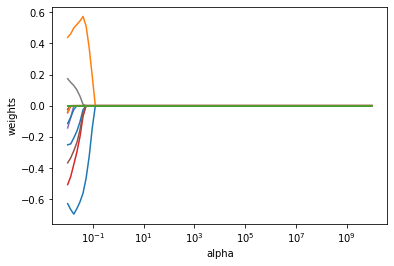

In [198]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [199]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

1.2387076284244254

In [200]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

number_dwellings                   -0.386809
number_habitablerooms              -0.065428
own_radio_Yes                       0.000000
own_television_Yes                  0.232800
own_satelitedish_Yes               -0.016697
own_smartphone_Yes                 -0.202924
own_refrigerator_Yes                0.000000
own_table_Yes                       0.097711
own_bed_Yes                         0.328268
own_mattress_Yes                   -0.028400
own_mosquitonet_Yes                 0.378903
own_fan_Yes                        -0.113114
own_bicycle_Yes                    -0.036744
own_motorcycle_Yes                  0.139163
own_generator_Yes                   0.895394
own_solarpanels_Yes                -0.020060
own_kerosenestove_Yes               0.118633
own_charcoaljiko_Yes                0.038241
own_wheelbarrow_Yes                -0.214668
own_ironfencing_Yes                 0.104202
own_farmanimals_Yes                -0.254093
headFemale                          0.044217
shareFemal